In [138]:
import numpy as np
import pandas as pd
import SimpleITK as sitk
import os
from PIL import Image
import dicom
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
DIR="/home/htang6/data/train_subset00/"
cands_tr = pd.read_csv("/home/htang6/data/csv/train/annotations.csv")
cands_val = pd.read_csv("/home/htang6/data/csv/val/annotations.csv")

In [105]:
print cands_tr

      seriesuid      coordX      coordY       coordZ  diameter_mm
0    LKDS-00375 -122.003794  128.088202   384.529999     7.779042
1    LKDS-00640   69.824401  103.039681   251.599976    23.800629
2    LKDS-00728   93.105680  163.855363   225.500000    11.082654
3    LKDS-00095  115.437994 -153.882554  -104.800001     8.405077
4    LKDS-00807   52.641521   15.056442    69.535400    12.334892
5    LKDS-00807  -44.702381   66.123687   100.535400     8.289808
6    LKDS-00807 -108.547684  -14.594727   116.535400     7.232745
7    LKDS-00807 -119.902753    6.938332   174.535400    10.616278
8    LKDS-00137 -129.004266 -145.044870  1973.200012    13.607612
9    LKDS-00137 -129.482627 -145.365183  1973.800012    13.901623
10   LKDS-00230  -29.271833   23.728997   -23.000000    23.312461
11   LKDS-00804  103.650291   66.574199   221.750000    22.840242
12   LKDS-00755  -89.794760  228.247859   384.300003     9.899031
13   LKDS-00140  -83.949653  177.283854   290.199978     4.902209
14   LKDS-

In [106]:
cands_tr = cands_tr.sort(["seriesuid"])
print cands_tr

      seriesuid      coordX      coordY      coordZ  diameter_mm
65   LKDS-00001  -76.449879  -49.540571  229.500000    14.180405
177  LKDS-00003  -82.905787  106.263573  226.224976     5.200858
178  LKDS-00003  -92.705387  191.515214  228.724976     6.723286
304  LKDS-00004  -68.270833  209.412809  167.229885    22.517480
793  LKDS-00005 -147.952967 -164.169479 -273.434241     5.898208
286  LKDS-00007  -36.303583   68.367853   18.875000     6.347767
822  LKDS-00011   79.240951  105.062110 -170.126775     5.838910
250  LKDS-00013  -42.644951  -86.651939 -139.800002    15.884164
465  LKDS-00015  -61.142430  -93.778010   -3.200001     8.262994
887  LKDS-00016   75.454504    7.903214 -194.368523     7.631709
886  LKDS-00016   93.138882   -5.652615 -213.910615     6.209760
885  LKDS-00016 -127.532989  -29.607902 -253.697616     8.269325
650  LKDS-00019   34.652929   18.541730  -79.084230     4.812693
649  LKDS-00019  -71.709390  -47.089729 -218.416849     4.506690
444  LKDS-00020  -59.7787

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [109]:
for i, row in cands_tr.iterrows():
    print row
    # break

seriesuid      LKDS-00001
coordX           -76.4499
coordY           -49.5406
coordZ              229.5
diameter_mm       14.1804
Name: 65, dtype: object
seriesuid      LKDS-00003
coordX           -82.9058
coordY            106.264
coordZ            226.225
diameter_mm       5.20086
Name: 177, dtype: object
seriesuid      LKDS-00003
coordX           -92.7054
coordY            191.515
coordZ            228.725
diameter_mm       6.72329
Name: 178, dtype: object
seriesuid      LKDS-00004
coordX           -68.2708
coordY            209.413
coordZ             167.23
diameter_mm       22.5175
Name: 304, dtype: object
seriesuid      LKDS-00005
coordX           -147.953
coordY           -164.169
coordZ           -273.434
diameter_mm       5.89821
Name: 793, dtype: object
seriesuid      LKDS-00007
coordX           -36.3036
coordY            68.3679
coordZ             18.875
diameter_mm       6.34777
Name: 286, dtype: object
seriesuid      LKDS-00011
coordX             79.241
coordY            1

In [121]:
count = 0
for f in os.listdir(DIR):
    if f.split(".")[1] == "mhd":
        img_path = DIR + f
        count += 1
        numpyImage, numpyOrigin, numpySpacing = load_itk_image(img_path)
        print numpySpacing, numpyImage.shape
print count

[ 0.69999999  0.65234399  0.65234399] (419, 512, 512)
[ 1.          0.76953101  0.76953101] (385, 512, 512)
[ 1.          0.71093798  0.71093798] (280, 512, 512)
[ 1.          0.61132801  0.61132801] (325, 512, 512)
[ 2.5         0.74218798  0.74218798] (133, 512, 512)
[ 1.25        0.60156202  0.60156202] (253, 512, 512)
[ 1.          0.76171899  0.76171899] (356, 512, 512)
[ 0.625     0.703125  0.703125] (564, 512, 512)
[ 1.79999995  0.625       0.625     ] (197, 512, 512)
[ 1.25        0.60351598  0.60351598] (270, 512, 512)
[ 0.625  0.625  0.625] (477, 512, 512)
[ 1.25        0.56640601  0.56640601] (240, 512, 512)
[ 1.79999995  0.72265601  0.72265601] (181, 512, 512)
[ 2.        0.703125  0.703125] (164, 512, 512)
[ 0.625       0.58593798  0.58593798] (481, 512, 512)
[ 1.25        0.66406202  0.66406202] (221, 512, 512)
[ 2.          0.58593798  0.58593798] (163, 512, 512)
[ 1.          0.68359399  0.68359399] (329, 512, 512)
[ 0.625  0.625  0.625] (449, 512, 512)
[ 1.25        0.

In [91]:
print "Mean nodule size: ", np.mean(cands_tr.diameter_mm)

Mean nodule size:  9.52933483532


In [92]:
# print val
print "Mean nodule size: ", np.mean(cands_val.diameter_mm)

Mean nodule size:  11.488928879


In [22]:
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    # print itkimage
    numpyImage = sitk.GetArrayFromImage(itkimage)
    numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))
    numpySpacing = np.array(list(reversed(itkimage.GetSpacing())))
    return numpyImage, numpyOrigin, numpySpacing

In [25]:
def worldToVoxelCoord(worldCoord, origin, spacing):
            stretchedVoxelCoord = np.absolute(worldCoord - origin)
            voxelCoord = stretchedVoxelCoord / spacing
            return voxelCoord

In [47]:
def normalizePlanes(npzarray):
            maxHU = 400.
            minHU = -1000.
            npzarray = (npzarray - minHU) / (maxHU - minHU)
            npzarray[npzarray>1] = 1.
            npzarray[npzarray<0] = 0.
            return npzarray

In [125]:
img_path  = '/home/htang6/data/train_subset00/LKDS-00001.mhd'
numpyImage, numpyOrigin, numpySpacing = load_itk_image(img_path)

LKDS-00001
[ 229.5         -49.54057104  -76.4498794 ]
[ 144.     194.584  162.464]
[[ 0.84357143  0.84285714  0.79142857 ...,  0.11571429  0.13071429
   0.14357143]
 [ 0.80571429  0.75071429  0.71428571 ...,  0.12428571  0.13285714
   0.13428571]
 [ 0.73214286  0.71214286  0.69571429 ...,  0.13        0.14142857
   0.12071429]
 ..., 
 [ 0.13571429  0.115       0.125      ...,  0.39357143  0.59214286
   0.60785714]
 [ 0.12642857  0.12        0.11571429 ...,  0.31357143  0.55785714
   0.63357143]
 [ 0.13142857  0.11928571  0.10642857 ...,  0.215       0.47571429
   0.61142857]]
(162, 130)


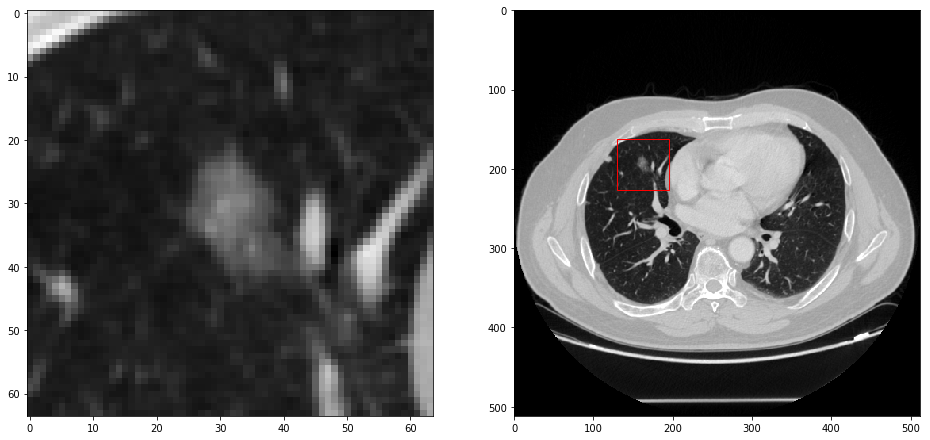

In [147]:
print cands_tr.seriesuid[65]
worldCoord = np.array([float(cands_tr.coordZ[65]), float(cands_tr.coordY[65]), float(cands_tr.coordX[65])])
print worldCoord
voxelCoord = worldToVoxelCoord(worldCoord, numpyOrigin, numpySpacing)
print voxelCoord
voxelWidth = 65

plt.rcParams['figure.figsize'] = (16.0, 8.0)
fig,ax = plt.subplots(1,2)
patch = numpyImage[int(voxelCoord[0]),int(voxelCoord[1]-voxelWidth/2):int(voxelCoord[1]+voxelWidth/2), 
                   int(voxelCoord[2]-voxelWidth/2):int(voxelCoord[2]+voxelWidth/2)]
patch = normalizePlanes(patch)
numpyImage = normalizePlanes(numpyImage)
print patch
print (int(voxelCoord[1]-voxelWidth/2),int(voxelCoord[2]-voxelWidth/2))
rect = patches.Rectangle((int(voxelCoord[2]-voxelWidth/2),int(voxelCoord[1]-voxelWidth/2)),voxelWidth,voxelWidth,
                         linewidth=1,edgecolor='r',facecolor='none')
ax[0].imshow(patch, cmap="gray")
ax[1].add_patch(rect)
ax[1].imshow(numpyImage[int(voxelCoord[0])], cmap="gray")
plt.show

# Revocer to original resolution
plt.rcParams['figure.figsize'] = (6.0, 4.0)

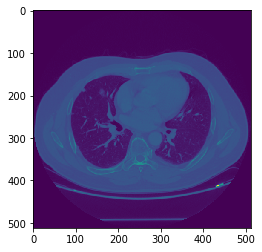

In [95]:
plt.imshow(numpyImage[int(voxelCoord[0])])

(281, 512, 512)
[  49.5 -206.5 -207.5]
[ 1.25        0.80664098  0.80664098]


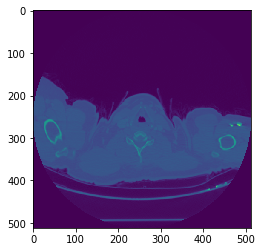

In [96]:
print numpyImage.shape
print numpyOrigin
print numpySpacing
plt.imshow(numpyImage[2])

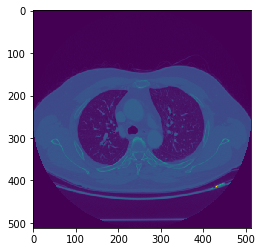

In [97]:
plt.imshow(numpyImage[100])

LKDS-00001


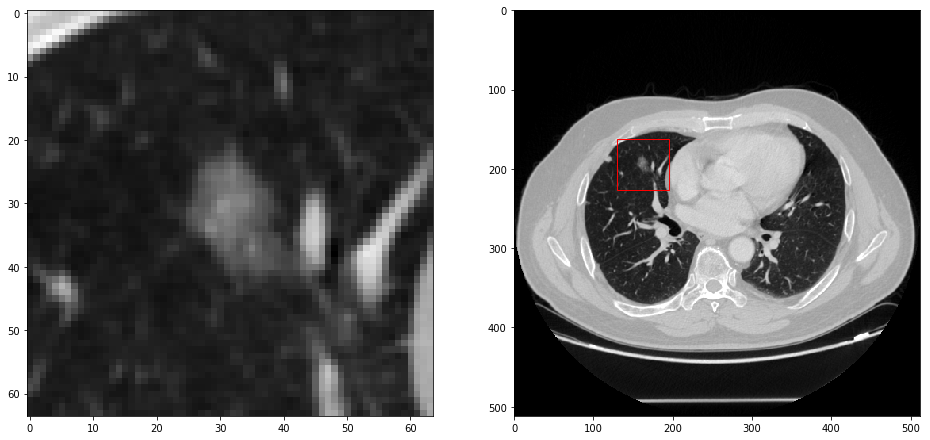

LKDS-00003


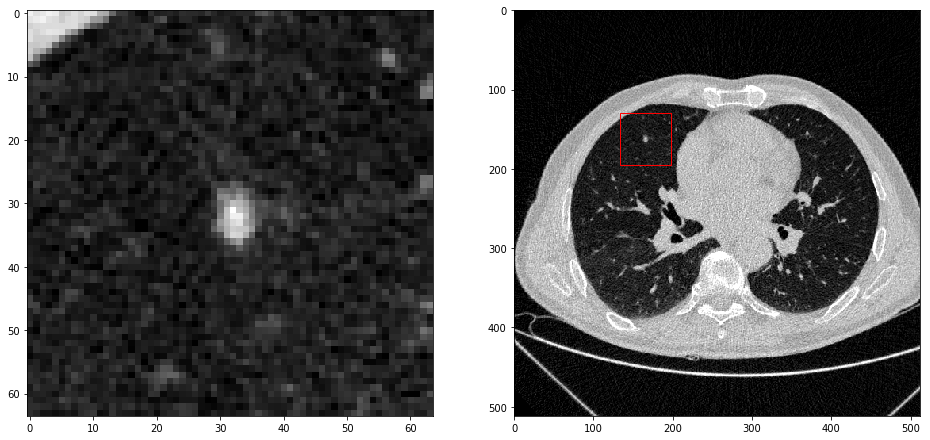

LKDS-00003


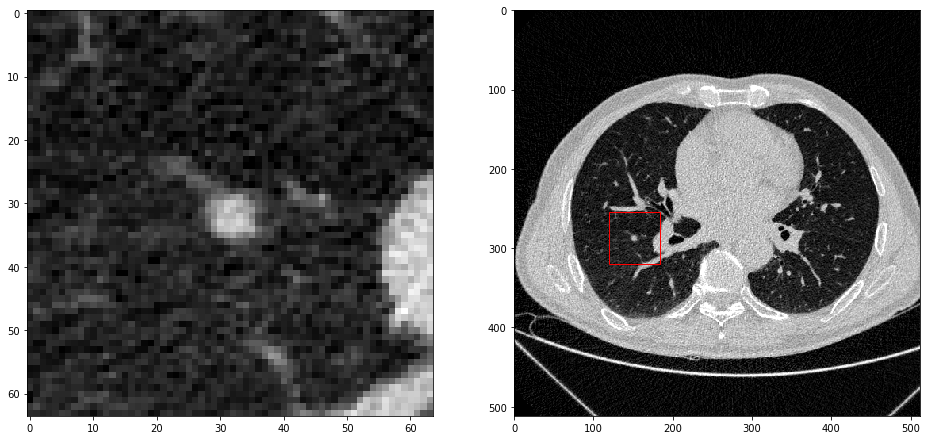

LKDS-00004


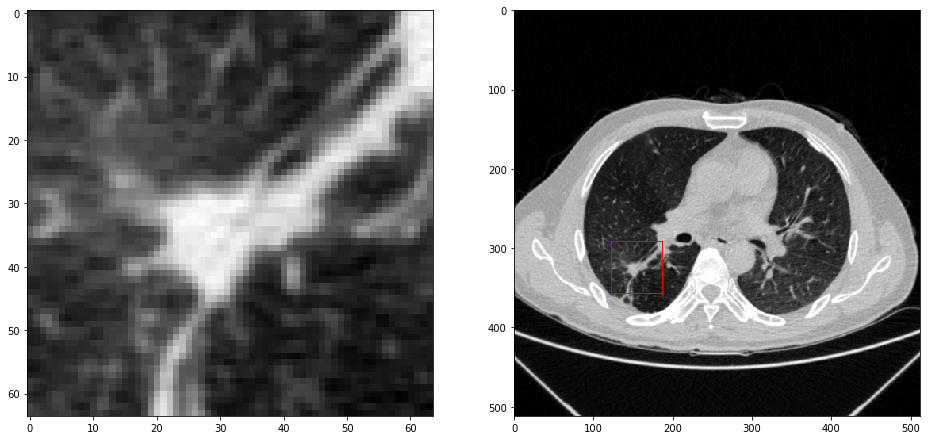

LKDS-00005


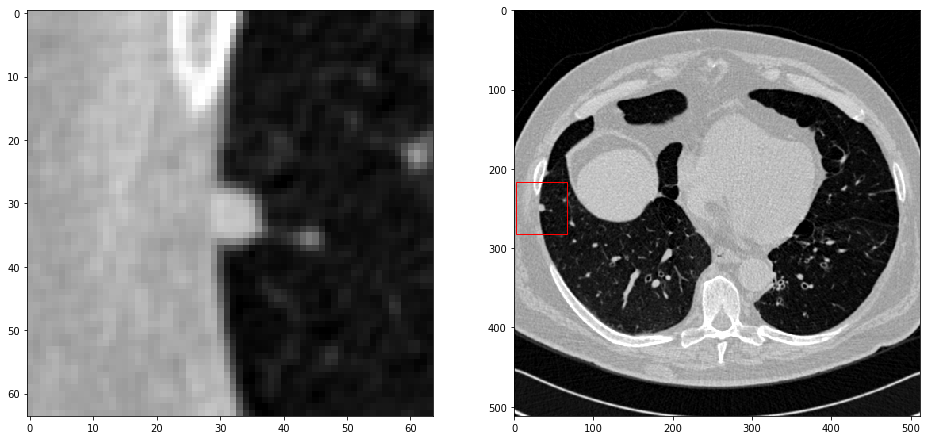

LKDS-00007


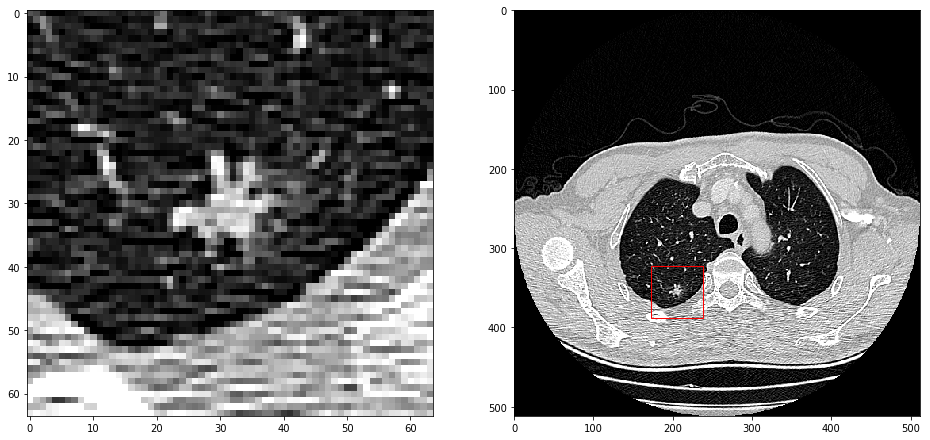

LKDS-00011


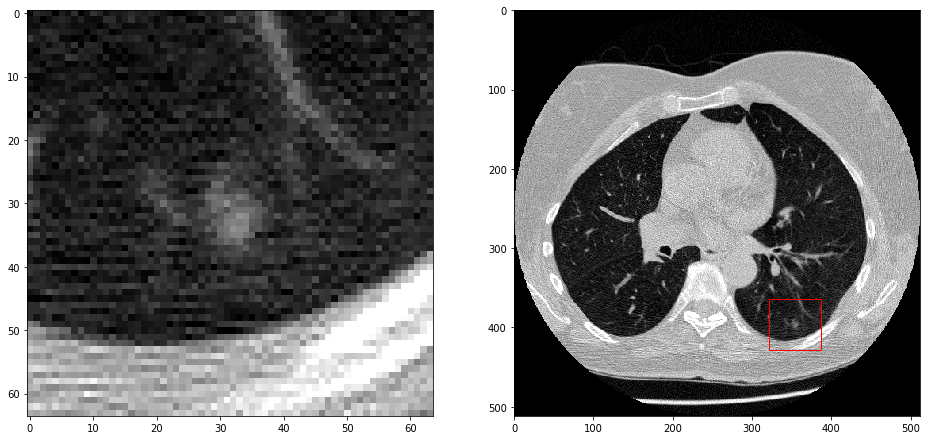

LKDS-00013


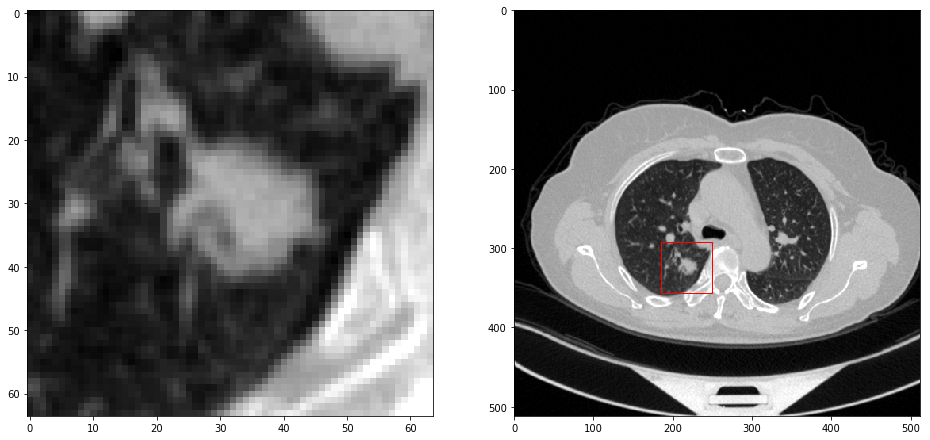

LKDS-00015


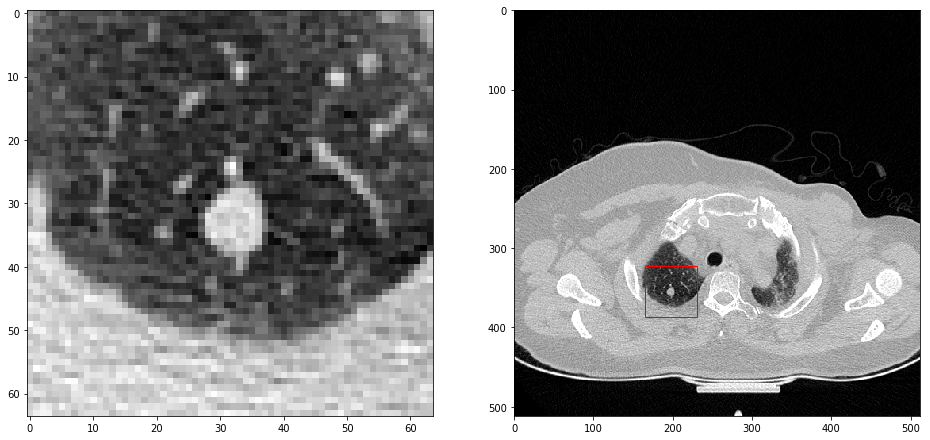

LKDS-00016


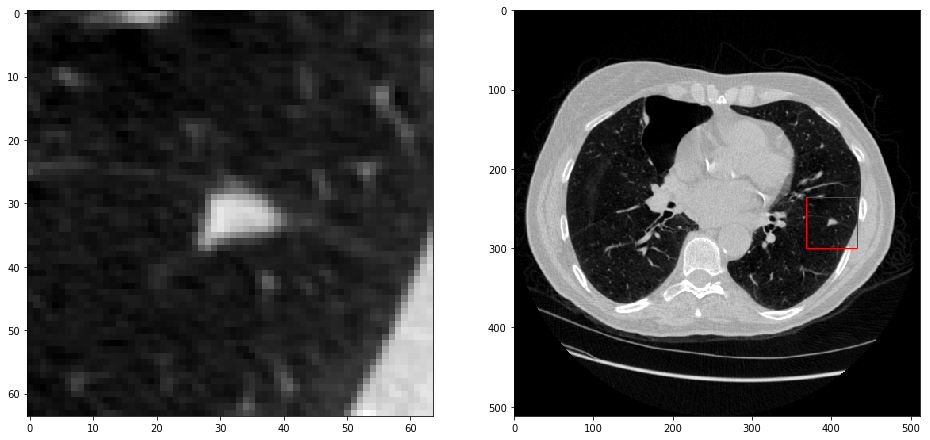

LKDS-00016


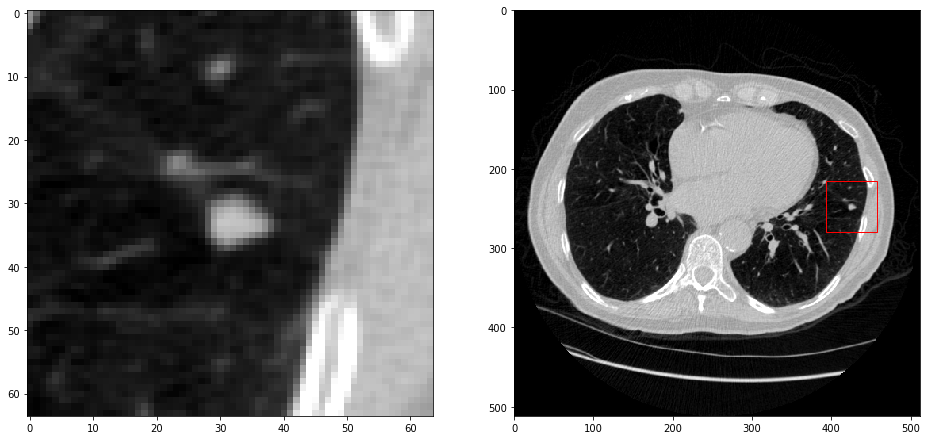

LKDS-00016


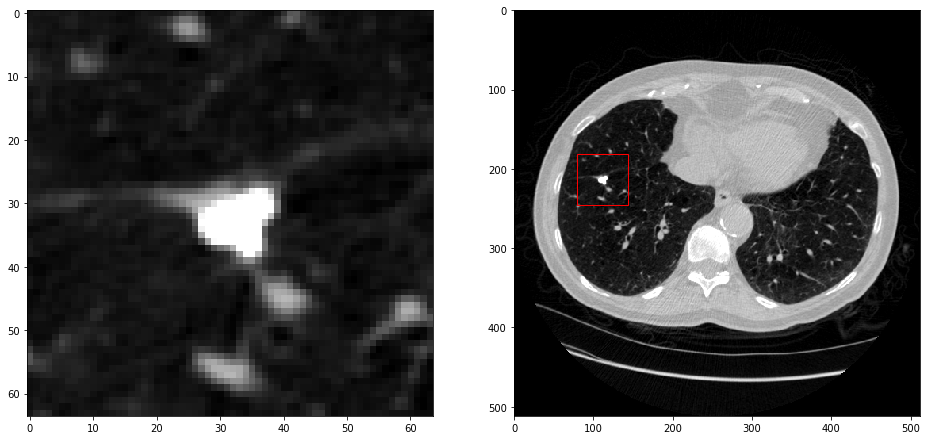

LKDS-00019


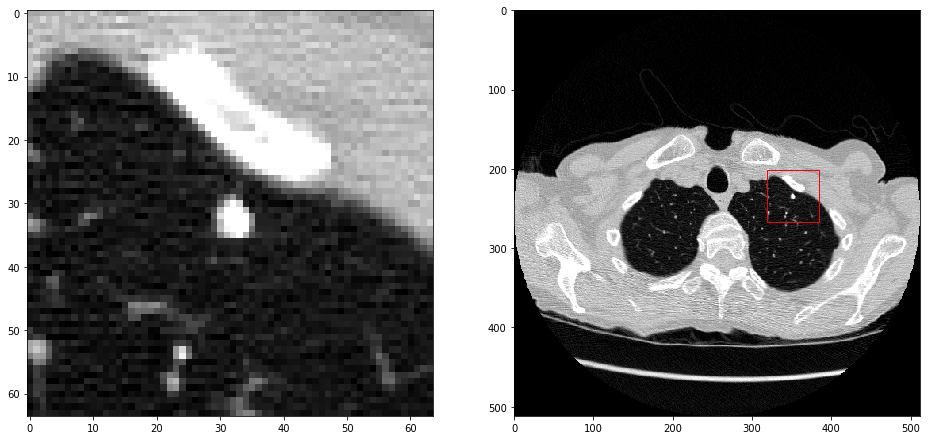

LKDS-00019


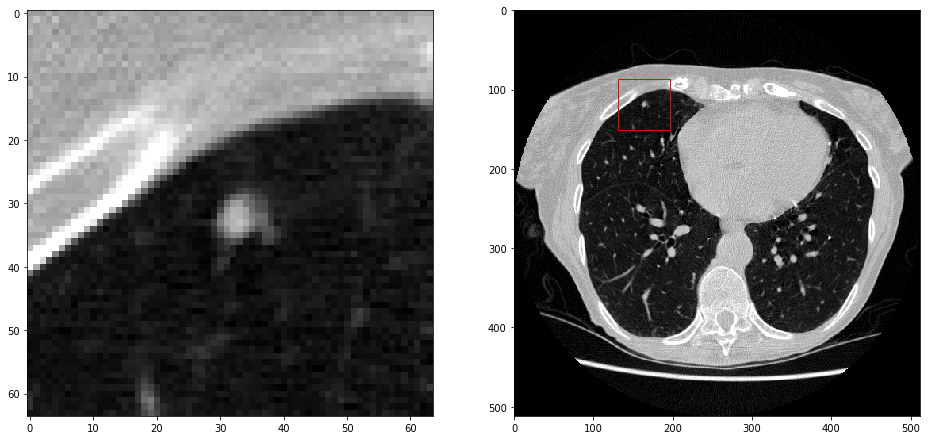

LKDS-00020


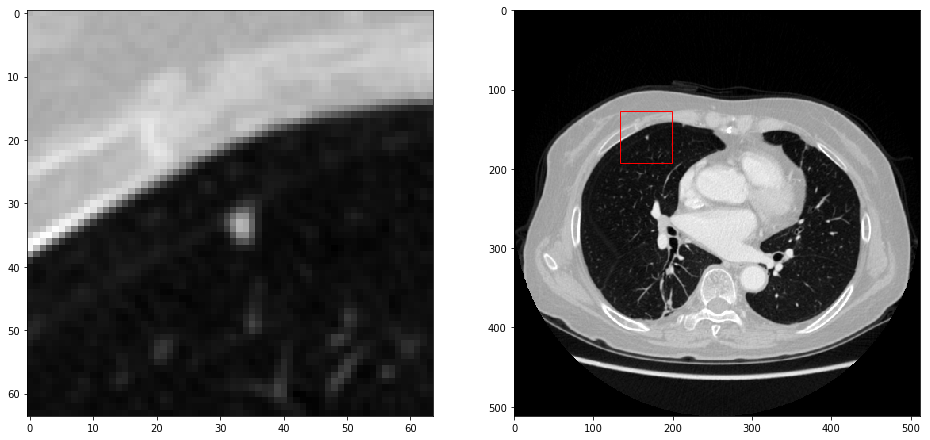

LKDS-00020


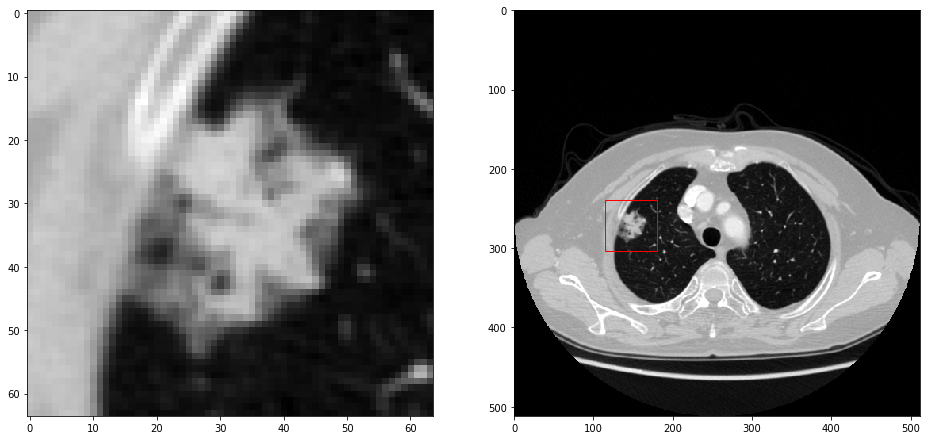

LKDS-00020


In [ ]:
for i, cand in cands_tr.iterrows():
    print cand.seriesuid
    img_path  = DIR + cand.seriesuid + ".mhd"
    numpyImage, numpyOrigin, numpySpacing = load_itk_image(img_path)
    worldCoord = np.array([float(cand.coordZ), float(cand.coordY), float(cand.coordX)])
    voxelCoord = worldToVoxelCoord(worldCoord, numpyOrigin, numpySpacing)
    voxelWidth = 65
    
    plt.rcParams['figure.figsize'] = (16.0, 8.0)
    fig,ax = plt.subplots(1,2)
    patch = numpyImage[int(voxelCoord[0]),int(voxelCoord[1]-voxelWidth/2):int(voxelCoord[1]+voxelWidth/2), 
                       int(voxelCoord[2]-voxelWidth/2):int(voxelCoord[2]+voxelWidth/2)]
    patch = normalizePlanes(patch)
    numpyImage = normalizePlanes(numpyImage)
    # print patch
    # print (int(voxelCoord[1]-voxelWidth/2),int(voxelCoord[2]-voxelWidth/2))
    rect = patches.Rectangle((int(voxelCoord[2]-voxelWidth/2),int(voxelCoord[1]-voxelWidth/2)),voxelWidth,voxelWidth,
                             linewidth=1,edgecolor='r',facecolor='none')
    ax[0].imshow(patch, cmap="gray")
    ax[1].add_patch(rect)
    ax[1].imshow(numpyImage[int(voxelCoord[0])], cmap="gray")
    plt.show()